<a href="https://colab.research.google.com/github/omshewale20195/DATA-science-/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:30<00:00, 34.9MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.5MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [40]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2


In [7]:
# generater are use for large amounts of data generaters make for a
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
# generater are use for large amounts of data generaters make for a
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize Numpy to pandas
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [66]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.5649 - loss: 2.7192 - val_accuracy: 0.5678 - val_loss: 0.9649
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.6584 - loss: 0.6314 - val_accuracy: 0.7084 - val_loss: 0.5726
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7494 - loss: 0.5190 - val_accuracy: 0.7352 - val_loss: 0.5497
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.7882 - loss: 0.4482 - val_accuracy: 0.7100 - val_loss: 0.5948
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 82ms/step - accuracy: 0.8275 - loss: 0.3818 - val_accuracy: 0.7926 - val_loss: 0.4460
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8496 - loss: 0.3390 - val_accuracy: 0.8080 - val_loss: 0.4410
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8850 - loss: 0.2798 - val_accuracy: 0.7652 - val_loss: 0.6626
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9148 - loss: 0.2103 - 

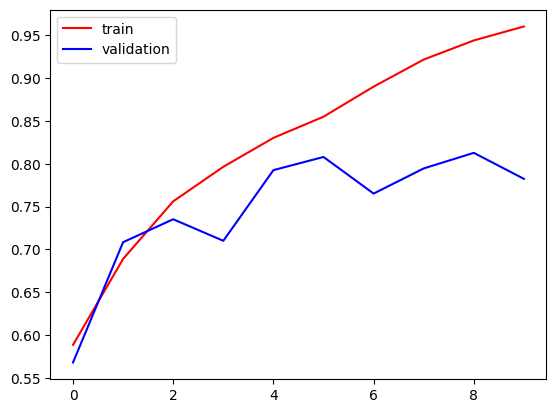

In [69]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

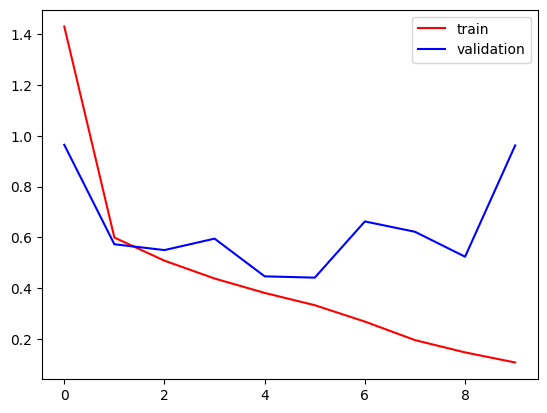

In [70]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [21]:
# way to reduse overfiting
# add more data
# data Argument ->> Next video
# L1/L2 Regularazation
# Dropouts
#Batch norm
#REduce complexity

In [71]:
import cv2

In [74]:
test_img = cv2.imread('/content/dog.jpg')

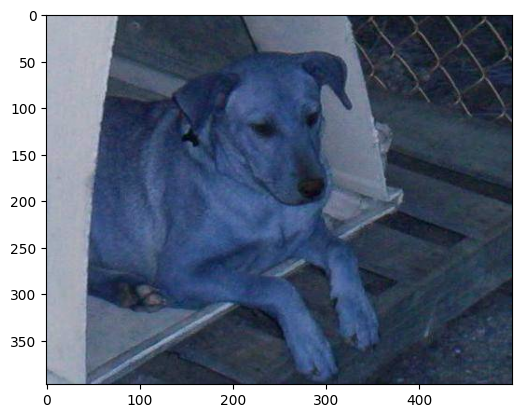

In [75]:
plt.imshow(test_img)

In [76]:
test_img = cv2.resize(test_img,(256,256))

In [77]:
test_input = test_img.reshape((1,256,256,3))

In [78]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


array([[1.]], dtype=float32)

In [80]:
test_img = cv2.imread('/content/cat.jpeg')

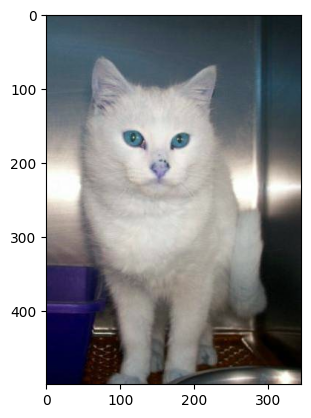

In [81]:
plt.imshow(test_img)

In [82]:
test_img = cv2.resize(test_img,(256,256))

In [83]:
test_input = test_img.reshape((1,256,256,3))

In [84]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[2.6449627e-21]], dtype=float32)